                            OLS Regression Results                            
Dep. Variable:                    log   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     909.0
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           1.14e-08
Time:                        11:47:13   Log-Likelihood:               -0.55278
No. Observations:                   9   AIC:                             5.106
Df Residuals:                       7   BIC:                             5.500
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2605      0.179     51.643      0.0

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


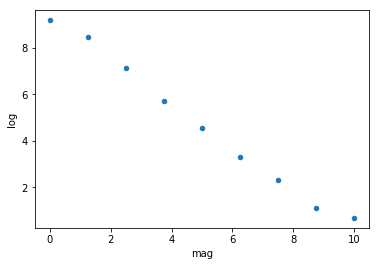

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

df = pd.read_csv('query.csv')
# df.query('magType == "ml"').mag.hist(bins = 30)


df['count'] = pd.cut(df['mag'], np.linspace(2.5,df['mag'].max(),10))
f = df['count'].value_counts()
# df.groupby('count').count()

g = f.to_frame()

g['log']  = np.log(g['count'])
# g.info()

import matplotlib.pyplot as plt
# g.plot(kind = 'bar')
# g['log'].plot(kind='scatter')


g['mag'] = np.linspace(0,10, g.shape[0])

g.plot(x = 'mag', y = 'log', kind='scatter')

result = sm.ols(formula="log ~ mag", data=g).fit()
print(result.summary())